### Assignment 1
Submitted By: Ishan Ghosh, B170473CS, CSE

In [1]:
import math
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iterations=500):
        self.k = k
        self.tolerance = 0.0001
        self.max_iterations = max_iterations
        
    def calc_distance(self, p1, p2):
        sq_dist = 0
        for i in range(len(p1)):
            sq_dist += (p1[i] - p2[i])**2
        return math.sqrt(sq_dist)
    
    def mean(self, cluster):
        sum_val = [0] * (len(cluster[0]))
        for data in cluster:
            sum_val += data
        return sum_val / len(cluster)
    
    def fit(self, data, centroids):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = centroids[i]
        
        self.sicds = []
        for i in range(self.max_iterations):
            self.classes = {}
            self.pred = []
            for i in range(self.k):
                self.classes[i] = []
                
            sicd = 0
            for point in data:
                distances = []
                for centroid in self.centroids:
                    dist = self.calc_distance(point, self.centroids[centroid])
                    distances.append(dist)
                
                cluster = distances.index(min(distances))
                self.pred.append(cluster)
                self.classes[cluster].append(point)
                if cluster > 2 or cluster < 0:
                    raise Exception('Incorrect Cluster')
                
                sicd += (min(distances))**2
            
            self.sicds.append(sicd)
            prev_cent = dict(self.centroids)
            
            for cluster in self.classes:
                self.centroids[cluster] = self.mean(self.classes[cluster])

            
            isOptimal = False
            flag = 0
            for centroid in self.centroids:
                org_centroid = prev_cent[centroid]
                curr_centroid = self.centroids[centroid]
                if (org_centroid == curr_centroid).all():
                    flag += 1
                    
            if flag == 3:
                isOptimal =True
                    
            if isOptimal:
                break

### 1)
Suppose that the data mining task is to cluster the following eight points (with (x, y) representing location) into three clusters:

A1(2, 10), A2(2, 5), A3(8, 4), B1(5, 8), B2(7, 5), B3(6, 4), C1(1, 2), C2(4, 9):

The distance function is Euclidean distance. Suppose initially we assign A1, B1, and C1 as the center of each cluster, respectively. Use the k-means algorithm to show only

(a) The three cluster centers after the first round execution

(b) The final three clusters

In [2]:
# import libraries for data store and graph plotting
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

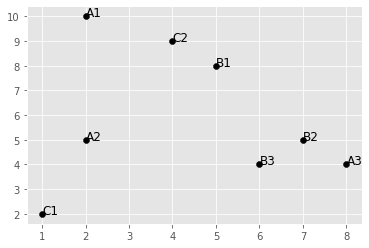

In [3]:
# create the input data
X = np.array([[2,10],
              [2,5],
              [8,4],
              [5,8],
              [7,5],
              [6,4],
              [1,2],
              [4,9]])

txt = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2']

# plot current input data
plt.scatter(X[:,0], X[:,1], c='black')
for i, point in enumerate(txt):
    plt.annotate(point, (X[i][0], X[i][1]), fontsize='large')
plt.show()

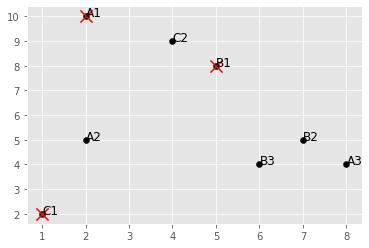

In [4]:
# create the input data
X = np.array([[2,10],
              [2,5],
              [8,4],
              [5,8],
              [7,5],
              [6,4],
              [1,2],
              [4,9]])

centroids = np.array([[2,10],
              [5,8],
              [1,2]])

txt = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2']

# plot current input data with centroids
plt.scatter(X[:,0], X[:,1], c='black')
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=150, marker='x')
for i, point in enumerate(txt):
    plt.annotate(point, (X[i][0], X[i][1]), fontsize='large')
plt.show()

In [5]:
def plot_graph(km):
    colors = 10*["r", "g", "c", "b", "k"]
    txt = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2']
    for centroid in km.centroids:
        plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s=130, marker='x')
    for classification in km.classes:
        color = colors[classification]
        for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color=color, s=30)
    for i, point in enumerate(txt):
        plt.annotate(point, (X[i][0], X[i][1]), fontsize='large')
    plt.show()

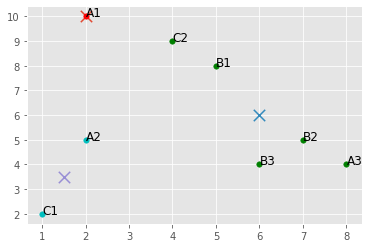

Centroids:
[ 2. 10.]
[6. 6.]
[1.5 3.5]


In [6]:
# solves (a) run for only one iteration
km = KMeans(3, 1)
centroids = np.array([[2,10],
              [5,8],
              [1,2]])
km.fit(X, centroids)

plot_graph(km)

print('Centroids:')
for centroid in km.centroids:
    print(km.centroids[centroid])

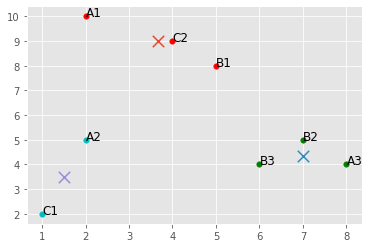

Centroids:
[3.66666667 9.        ]
[7.         4.33333333]
[1.5 3.5]


In [7]:
# solves (b)
km = KMeans(3)
centroids = np.array([[2,10],
              [5,8],
              [1,2]])
km.fit(X, centroids)

plot_graph(km)

print('Centroids:')
for centroid in km.centroids:
    print(km.centroids[centroid])

In [8]:
print('Clustering Solution:')
print('1st Cluster:')
print(np.array(km.classes[0]))
print('')
print('2nd Cluster:')
print(np.array(km.classes[1]))
print('')
print('3rd Cluster:')
print(np.array(km.classes[2]))

Clustering Solution:
1st Cluster:
[[ 2 10]
 [ 5  8]
 [ 4  9]]

2nd Cluster:
[[8 4]
 [7 5]
 [6 4]]

3rd Cluster:
[[2 5]
 [1 2]]


In [9]:
del km

### 2) 
Write a program to implement k-means clustering algorithm by using Iris data set (available in UCI Machine learning repository) and find the followings:

i) Clusters of the Iris data set (final clustering solution). 

ii) Sum of the Intra-Cluster Distances (SICD) or Sum of the Squired Error (SSE) valuesof the obtained clustering solution. 

iii)Graphical representation of the obtained clusters.

iv)Give 150 iterations of theimplemented k-means by changing the initial centroids and see the changes in the clusteringsolution(SICD values).

v)Plot iteration vs. SICD values.

In [10]:
# libraries for loading data and graph plotting
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import style
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

style.use('ggplot')

In [11]:
iris = datasets.load_iris()
# reading and shuffling input
X, y = shuffle(iris.data, iris.target, random_state=1126) # random_state is done so that results can be reporduced
X = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(y, columns=['Target'])

In [12]:
print("Iris Data (1st 10 after shuffling): ")
print(X[:10])

Iris Data (1st 10 after shuffling): 
   Sepal Length  Sepal Width  Petal Length  Petal Width
0           4.4          3.2           1.3          0.2
1           6.0          2.7           5.1          1.6
2           5.0          3.0           1.6          0.2
3           6.9          3.1           5.1          2.3
4           7.7          3.8           6.7          2.2
5           6.7          3.1           4.4          1.4
6           4.4          3.0           1.3          0.2
7           6.4          3.2           5.3          2.3
8           6.4          3.1           5.5          1.8
9           6.3          2.3           4.4          1.3


In [13]:
import matplotlib.patches as mpatches

# color cordination of clusters
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

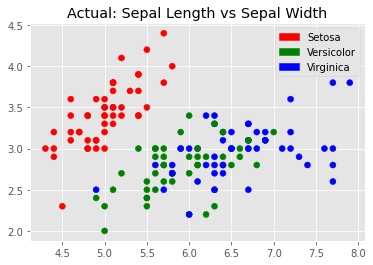

In [14]:
X_actual = pd.DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y_actual = pd.DataFrame(y, columns=['Target'])

plt.scatter(X_actual['Sepal Length'], X_actual['Sepal Width'], c=colors[y_actual['Target']])
plt.title('Actual: Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

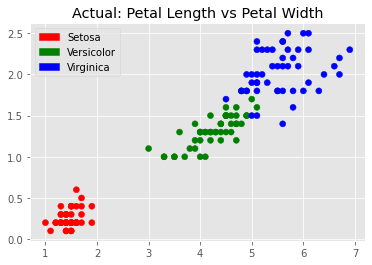

In [15]:
plt.scatter(X_actual['Petal Length'], X_actual['Petal Width'], c=colors[y_actual['Target']])
plt.title('Actual: Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

In [16]:
# K means clustering on iris dataset
km = KMeans(3, 500)
# a random sample chosen as centroid
centroids = X.sample(n=3, random_state=1608)
print(centroids)
km.fit(X.values, centroids.values)

    Sepal Length  Sepal Width  Petal Length  Petal Width
6            4.4          3.0           1.3          0.2
73           6.0          2.2           4.0          1.0
69           5.6          2.7           4.2          1.3


In [17]:
print('Setosa:')
print(np.array(km.classes[0]))
print('')
print('Versicolor:')
print(np.array(km.classes[1]))
print('')
print('Virginica:')
print(np.array(km.classes[2]))

Setosa:
[[4.4 3.2 1.3 0.2]
 [5.  3.  1.6 0.2]
 [4.4 3.  1.3 0.2]
 [5.2 3.4 1.4 0.2]
 [4.8 3.  1.4 0.1]
 [4.9 3.6 1.4 0.1]
 [5.2 4.1 1.5 0.1]
 [5.4 3.9 1.7 0.4]
 [5.1 3.8 1.6 0.2]
 [5.  3.6 1.4 0.2]
 [4.6 3.4 1.4 0.3]
 [5.1 3.4 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.8 4.  1.2 0.2]
 [5.1 3.8 1.5 0.3]
 [5.4 3.7 1.5 0.2]
 [5.  3.4 1.6 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.3 1.7 0.5]
 [5.  3.5 1.3 0.3]
 [4.9 3.1 1.5 0.2]
 [5.1 3.7 1.5 0.4]
 [4.9 3.  1.4 0.2]
 [5.5 3.5 1.3 0.2]
 [4.8 3.1 1.6 0.2]
 [5.3 3.7 1.5 0.2]
 [4.7 3.2 1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [5.  3.4 1.5 0.2]
 [5.5 4.2 1.4 0.2]
 [5.4 3.4 1.5 0.4]
 [5.  3.3 1.4 0.2]
 [4.4 2.9 1.4 0.2]
 [5.1 3.5 1.4 0.2]
 [5.  3.5 1.6 0.6]
 [4.6 3.2 1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.4 3.4 1.7 0.2]
 [4.7 3.2 1.3 0.2]
 [4.8 3.4 1.9 0.2]
 [5.4 3.9 1.3 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.5 1.4 0.3]
 [5.7 4.4 1.5 0.4]
 [4.5 2.3 1.3 0.3]
 [5.1 3.8 1.9 0.4]
 [5.  3.2 1.2 0.2]
 [5.7 3.8 1.7 0.3]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.6 0.2]]

Versicolor:
[[6.  2.7 5.1 1.6]
 [6.7 3.1

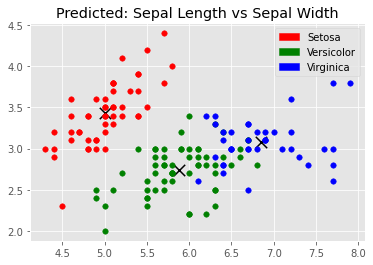

Centroids: [Sepal Length, Sepal Width]
[5.006 3.428] Setosa
[5.88360656 2.74098361] Versicolor
[6.85384615 3.07692308] Virginica


In [18]:
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s=130, marker='x', color='black')
    
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
            plt.scatter(features[0], features[1], color=color, s=30)

plt.title('Predicted: Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

print('Centroids: [Sepal Length, Sepal Width]')
print(km.centroids[0][:2], 'Setosa')
print(km.centroids[1][:2], 'Versicolor')
print(km.centroids[2][:2], 'Virginica')

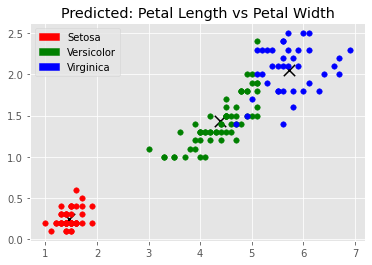

Centroids: [Petal Length, Petal Width]
[1.462 0.246] Setosa
[4.38852459 1.43442623] Versicolor
[5.71538462 2.05384615] Virginica


In [19]:
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][2], km.centroids[centroid][3], s=130, marker='x', color='black')
    
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
            plt.scatter(features[2], features[3], color=color, s=30)

plt.title('Predicted: Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

print('Centroids: [Petal Length, Petal Width]')
print(km.centroids[0][2:4], 'Setosa')
print(km.centroids[1][2:4], 'Versicolor')
print(km.centroids[2][2:4], 'Virginica')

In [20]:
print('SICD Error:')
print(km.sicds[-1])

SICD Error:
78.85566582597727


[293.25000000000006, 108.17299636149968, 85.6103010807329, 84.26527300347222, 83.39023263888889, 82.00418738904196, 81.08093414092328, 79.87357983461304, 79.34436414532671, 78.92130972222226, 78.85566582597727]


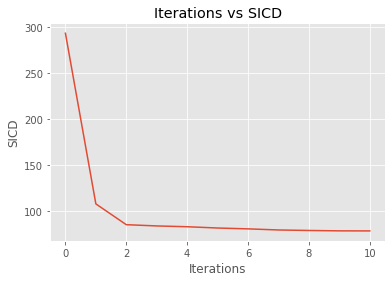

In [21]:
print(km.sicds)
# plot iterations vs SICD
plt.plot(km.sicds)
plt.xlabel('Iterations')
plt.ylabel('SICD')
plt.title('Iterations vs SICD')
plt.show()

In [22]:
print('Actual: ')
print(y.values.flatten())
print('Predicted: ')
print(np.array(km.pred))
from sklearn.metrics import accuracy_score
print('Accuracy Score: ')
print(accuracy_score(y.values.flatten(), np.array(km.pred)))
del km

Actual: 
[0 1 0 2 2 1 0 2 2 1 0 1 0 0 0 1 1 2 1 0 2 0 2 1 2 0 2 0 1 0 2 2 1 1 0 2 2
 1 2 0 0 1 2 0 0 1 0 0 0 1 2 1 2 0 0 1 1 2 0 2 2 2 0 1 2 0 2 0 1 1 1 1 2 1
 2 0 1 1 2 0 2 0 0 1 0 1 1 2 2 0 0 1 0 1 1 0 2 2 0 1 1 0 2 2 1 0 2 2 0 0 0
 1 2 0 0 1 2 2 1 2 0 1 1 2 0 0 0 2 1 1 1 0 1 2 1 1 2 1 1 2 1 2 0 2 2 2 2 0
 2 1]
Predicted: 
[0 1 0 2 2 1 0 2 2 1 0 1 0 0 0 1 1 2 1 0 2 0 1 1 2 0 2 0 2 0 2 2 1 1 0 2 2
 1 2 0 0 1 1 0 0 1 0 0 0 1 1 1 2 0 0 1 2 2 0 2 2 2 0 1 2 0 2 0 1 1 1 1 2 1
 1 0 1 1 1 0 2 0 0 1 0 1 1 2 2 0 0 1 0 1 1 0 2 1 0 1 1 0 1 2 1 0 1 2 0 0 0
 1 2 0 0 1 1 1 1 1 0 1 1 2 0 0 0 2 1 1 1 0 1 2 1 1 2 1 1 1 2 2 0 2 1 2 1 0
 2 1]
Accuracy Score: 
0.8866666666666667


In [23]:
all_sicd = []
for i in range(0, 150):
    km = KMeans(3, 500)
    centroids = X.sample(n=3)
    km.fit(X.values, centroids.values)
    all_sicd.append(km.sicds[-1])
    print(km.sicds[-1])
    del km

145.45269176485024
78.85566582597727
78.85144142614601
78.85566582597727
78.85144142614601
78.85144142614601
78.85566582597727
78.85566582597727
78.85566582597727
78.85144142614601
78.85144142614601
78.85566582597727
78.85566582597727
78.85144142614601
78.85566582597727
78.85144142614601
78.85144142614601
78.85566582597727
78.85144142614601
78.85144142614601
145.45269176485024
142.75406250000003
78.85566582597727
78.85144142614601
142.75406250000003
78.85566582597727
78.85144142614601
142.75406250000003
78.85566582597727
142.75406250000003
78.85566582597727
142.75406250000003
142.75406250000003
142.75406250000003
78.85144142614601
145.45269176485024
78.85144142614601
78.85144142614601
145.45269176485024
78.85144142614601
78.85566582597727
78.85144142614601
78.85144142614601
78.85144142614601
78.85144142614601
78.85566582597727
78.85566582597727
78.85566582597727
78.85144142614601
145.45269176485024
78.85566582597727
142.75406250000003
78.85566582597727
78.85566582597727
78.851441426146

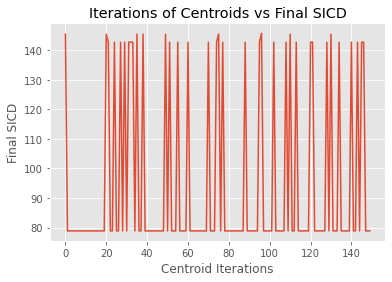

In [24]:
# All iterations
plt.plot(all_sicd)
plt.xlabel('Centroid Iterations')
plt.ylabel('Final SICD')
plt.title('Iterations of Centroids vs Final SICD')
plt.show()

In [25]:
print(min(all_sicd))

78.85144142614601
